# Unsupervised Machine Learning

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Clustering

In [2]:
df = pd.read_csv("/content/winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

In [8]:
scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


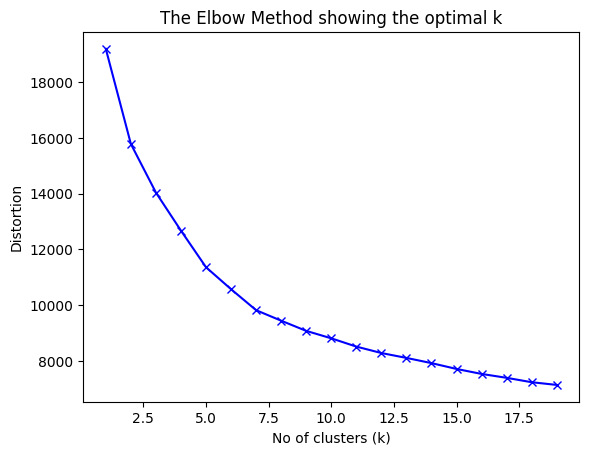

In [11]:
# Elbow Method

from sklearn.cluster import KMeans

distortions = []
K = range(1, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_df)
    distortions.append(kmeanModel.inertia_)

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('No of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### KMeans Clustering

In [20]:
km = KMeans(init="random", n_clusters=5)
km.fit(scaled_df)

KMeans(init='random', n_clusters=5)

In [21]:
km.labels_

array([4, 4, 4, ..., 1, 4, 1], dtype=int32)

In [22]:
scaled_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


### Dimensionality Reduction

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
decomposed_df = pca.fit_transform(scaled_df)

In [24]:
decomposed_df

array([[-1.77944158,  1.15730315],
       [-1.00418467,  2.07183784],
       [-0.91578319,  1.3934342 ],
       ...,
       [-1.36626511, -0.51756099],
       [-2.36714672,  0.70354479],
       [-0.28877628, -1.24084585]])

In [25]:
decomposed_df = pd.DataFrame(decomposed_df, columns=['x1', 'x2'])

In [26]:
decomposed_df['y'] = km.labels_
decomposed_df.head()

,x1,x2,y
0,-1.779442,1.157303,4
1,-1.004185,2.071838,4
2,-0.915783,1.393434,4
3,2.404077,-0.213792,0
4,-1.779442,1.157303,4


<Axes: xlabel='x1', ylabel='x2'>

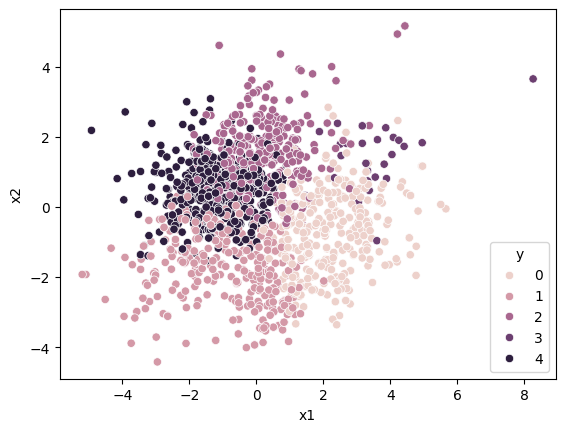

In [27]:
sns.scatterplot(x='x1', y='x2', hue='y', data=decomposed_df)

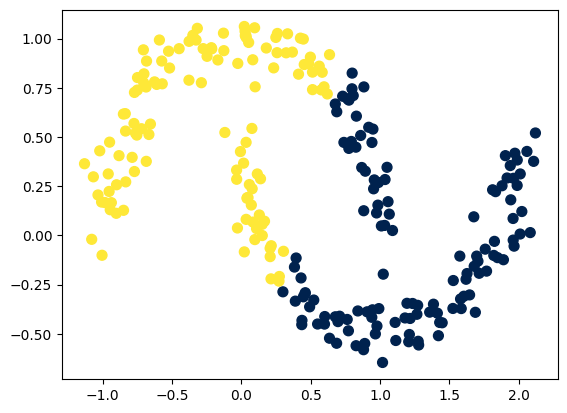

In [28]:
# Bad Use Case for KMeans (Moon-shaped dataa)

from sklearn.datasets import make_moons
X3, y3 = make_moons(250, noise=.075, random_state=22)

labels = KMeans(2, random_state=0).fit_predict(X3)
plt.scatter(X3[:, 0], X3[:, 1], c=labels, s=50, cmap='cividis')

In [30]:
from sklearn.metrics import davies_bouldin_score as dbs

print(dbs(scaled_df, km.labels_))

1.495761285584281


### Agglomerative Clustering

In [41]:
from sklearn.cluster import AgglomerativeClustering

clusters = AgglomerativeClustering(5).fit(scaled_df)

In [42]:
clusters.labels_

array([4, 4, 4, ..., 0, 0, 0])

In [43]:
decomposed_df['y'] = clusters.labels_
decomposed_df.head()

,x1,x2,y
0,-1.779442,1.157303,4
1,-1.004185,2.071838,4
2,-0.915783,1.393434,4
3,2.404077,-0.213792,2
4,-1.779442,1.157303,4


<Axes: xlabel='x1', ylabel='x2'>

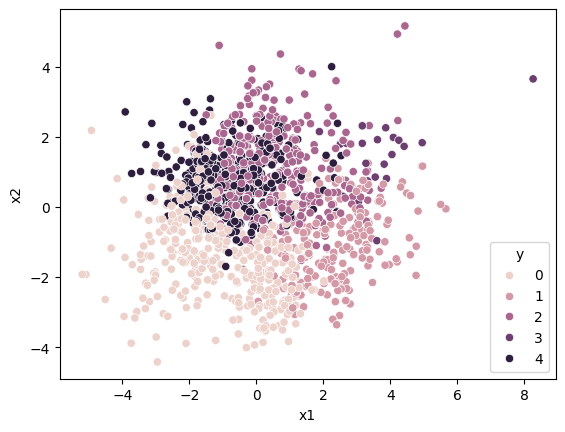

In [44]:
sns.scatterplot(x='x1', y='x2', hue='y', data=decomposed_df)

In [45]:
print(dbs(scaled_df, clusters.labels_))

1.7310892242676155


### DBSCAN|

In [46]:
from sklearn.cluster import DBSCAN

In [47]:
clusters = DBSCAN().fit(scaled_df)

In [49]:
decomposed_df['y'] = clusters.labels_

<Axes: xlabel='x1', ylabel='x2'>

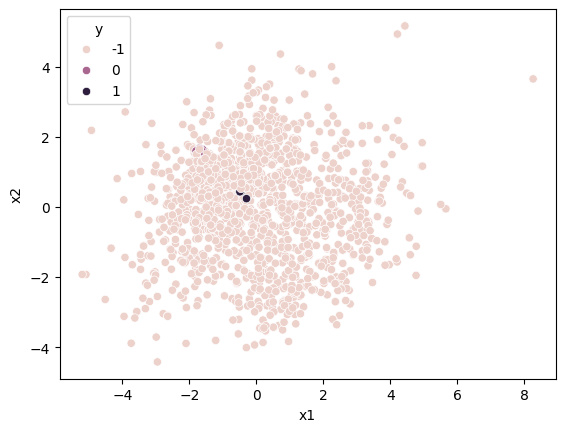

In [50]:
sns.scatterplot(x='x1', y='x2', hue='y', data=decomposed_df)

In [52]:
print(dbs(scaled_df, clusters.labels_))

1.4732012596122097


## Dimensionality Reduction

In [53]:
df = pd.read_csv("/content/autos.csv")

In [54]:
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [55]:
df.shape

(193, 25)

In [56]:
df.isnull().sum()

symboling            0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [57]:
from sklearn.decomposition import PCA

In [63]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

# Fetch all the object columns
obj_cols = df.select_dtypes(exclude=np.number).columns

# Encode all object type columns
for col in obj_cols:
  enc = LabelEncoder()
  df[col] = enc.fit_transform(df[col])

In [64]:
print(obj_cols)

Index(['make', 'fuel_type', 'aspiration', 'body_style', 'drive_wheels',
       'engine_location', 'engine_type', 'fuel_system'],
      dtype='object')


In [65]:
scaler = StandardScaler()

df_ = scaler.fit_transform(df)
df_ = pd.DataFrame(df_, columns=df.columns)

In [66]:
pca = PCA()

In [67]:
pca.fit(df_)

PCA()

In [68]:
pca.transform(df_)

array([[-0.69525942,  3.752761  ,  1.78634868, ...,  0.23034832,
         0.15657269, -0.08482364],
       [-0.58599817,  3.78659393,  1.81987817, ...,  0.19834759,
         0.11480618, -0.07978173],
       [ 1.072391  ,  2.73262063,  0.69442897, ..., -0.07855865,
        -0.14374415, -0.04940485],
       ...,
       [ 4.10286059, -0.01998101, -2.15068767, ..., -0.05921394,
         0.0849475 ,  0.1453181 ],
       [ 3.20111482, -4.00069914,  2.93176704, ..., -0.12921592,
        -0.30234576, -0.10449473],
       [ 3.66669764, -1.32107785, -1.02121256, ..., -0.15963636,
         0.2609103 , -0.29475291]])

In [69]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

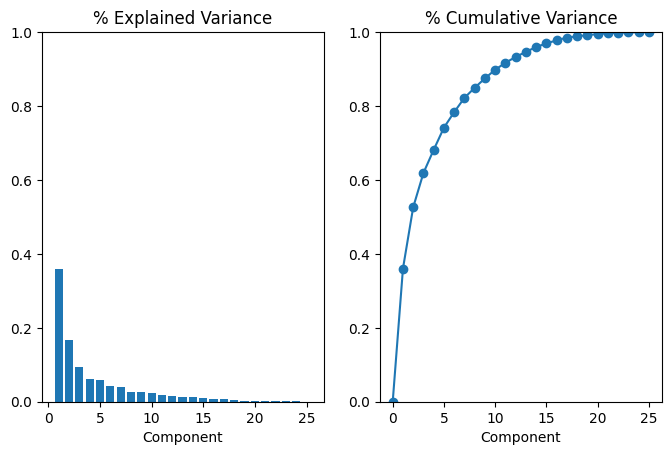

In [70]:
plot_variance(pca)

### Association Rule Mining

In [71]:
df = pd.read_csv("/content/Market Basket Analysis - Groceries_dataset.csv")

In [72]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [73]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Associationn Rule Mining with Apriori Algorithm

In [74]:
from mlxtend.frequent_patterns import apriori, association_rules

In [76]:
# Merge member_number with date

df['merged'] = df['Member_number'].astype(str) + " " + df['Date']

df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription,merged
0,1808,21-07-2015,tropical fruit,1808 21-07-2015
1,2552,05-01-2015,whole milk,2552 05-01-2015
2,2300,19-09-2015,pip fruit,2300 19-09-2015
3,1187,12-12-2015,other vegetables,1187 12-12-2015
4,3037,01-02-2015,whole milk,3037 01-02-2015


In [77]:
# Create a dataset that maps the frequency of each item

encoded_df = pd.crosstab(df["merged"], df["itemDescription"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
encoded_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
merged,,,,,,,,,,,,,,,,,,,,,
1000 15-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000 24-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000 24-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000 25-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000 27-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999 24-01-2015,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4999 26-12-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5000 09-03-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
def normalize(frequency):
    """
    Description:
        - This functions accepts the frequency of each column and normalizes it to 0 or 1.
          The output is 1 if the frequency is greater than 0, otherwise it is 0.
    Input:
        - frequency <int>: Frequency of the item

    Output:
        - result <int>: Normalized frequency
    """

    if frequency > 0:
        result = 1
    else:
        result = 0

    return result

basket_input = encoded_df.applymap(normalize)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [81]:
frequent_itemsets = apriori(basket_input, min_support = 0.001, use_colnames = True)

rules = association_rules(frequent_itemsets, metric = "lift")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [82]:
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755,-0.179204
1,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168,-0.185312
2,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443,-0.184234
3,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060,-0.201119
4,(UHT-milk),(sausage),0.021386,0.060349,0.001136,0.053125,0.880298,-0.000154,0.992371,-0.121998


In [83]:
rules.sort_values(["support", "confidence", "lift"], axis = 0, ascending = False).head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
622,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
623,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
695,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
694,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
551,(soda),(other vegetables),0.097106,0.122101,0.009691,0.099794,0.817302,-0.002166,0.975219,-0.198448
550,(other vegetables),(soda),0.122101,0.097106,0.009691,0.079365,0.817302,-0.002166,0.980729,-0.202951
648,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
649,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851
625,(yogurt),(rolls/buns),0.085879,0.110005,0.007819,0.091051,0.827697,-0.001628,0.979147,-0.185487
624,(rolls/buns),(yogurt),0.110005,0.085879,0.007819,0.071081,0.827697,-0.001628,0.984071,-0.189562


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


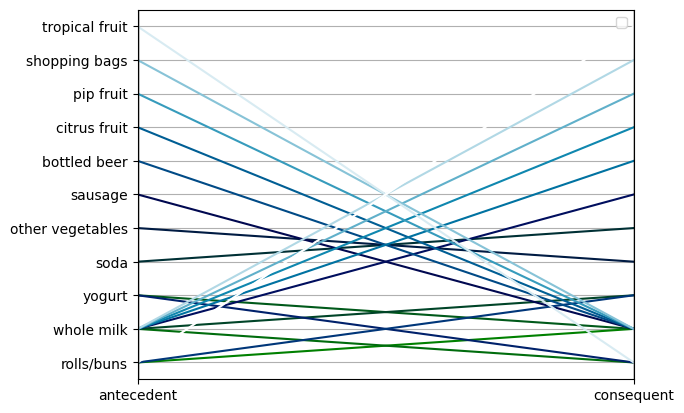

In [84]:
# Visualizing parallel coordinates

def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent:list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent:list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

coords = rules_to_coordinates(rules.sort_values(["support", "confidence", "lift"], axis = 0, ascending = False).head(20))

pd.plotting.parallel_coordinates(coords, 'rule', colormap='ocean')
plt.legend([])
plt.show()